<a href="https://colab.research.google.com/github/xeromark/TareasIA/blob/main/TareaIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea 2 de IA de Omar Marca. Github: https://github.com/xeromark/TareasIA

Para realizar esta tarea se hizo uso de la librería scikit-learn cuya documentación está en [este enlace](https://scikit-learn.org/stable/): https://scikit-learn.org/stable/

El dataset utilizado contiene información sobre el estado de salud de personas quienes tienen o no enfermedades del corazón y se puede conseguir en [este enlace](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset): https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

# Pregunta 1

## Entrene el algoritmo de regresión logística sobre los datos seleccionados y aplique clasificación con algún (sub)conjunto DISJUNTO de prueba. Adicionalmente, utilice dos métricas (a su elección) de error, explicando cada una de ellas y luego comparándolas entre sí.

Para hacer el analisis, se ha decidido tomar la columna HighBP (High blood pressure) para el eje Y, que corresponde a si la persona tiene o no hipertensión. Por otra parte, para el eje X se ha tomado el apartado de BMI (Body mass index) que corresponde al indice de masa corporal. A continuación, se muestra el código utilizado para clasificar los datos asociados a personas con y sin enfermedades del corazón:

Luego se tiene el siguiente gráfico:


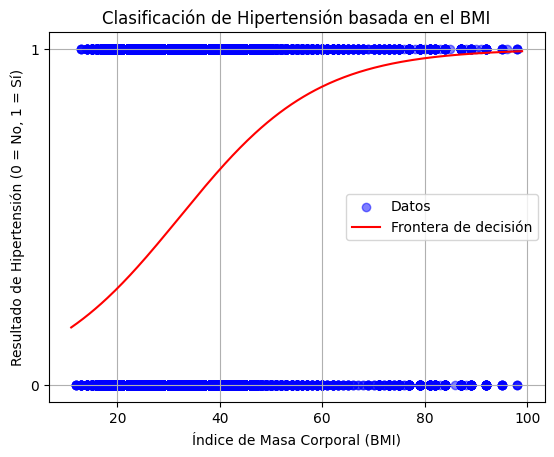

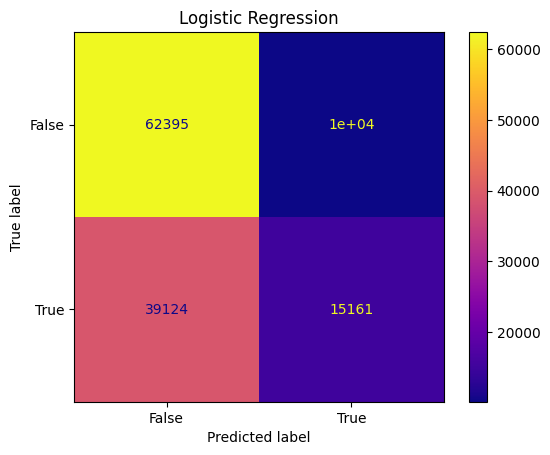

Donde:
TP (Verdaderos Positivos): 15161
FP (Falsos Positivos): 10160
FN (Falsos Negativos): 39124
TN (Verdaderos Negativos): 62395 

A partir de esto, se obtienen las siguiente métricas:
Acuraccy: 0.61
Recall: 0.28



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn import metrics

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('dataset.csv') # https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

# Seleccionar la característica del dataset de BMI y HighBP
x = df[['BMI']]    # Indice de masa corporal (BMI)
y = df['HighBP']  # si tiene o no Hipertensión (HighBP)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)
# el 50% de los datos se usan para pruebas y el resto para entrenar (parametro asociado a test_size)

model = LogisticRegression(max_iter=100000) # Crear el modelo de regresión logística
model.fit(X_train, y_train) # entrenar el modelo

# Predecir en el conjunto de prueba
predictions = model.predict(X_test)

print("Luego se tiene el siguiente gráfico:")

# Graficar los datos
plt.scatter(x, y, color='blue', label='Datos', alpha=0.5)

# Graficar la frontera de decisión
# Crear un rango de valores de BMI
BMI_range = np.linspace(df['BMI'].min()-1, df['BMI'].max()+1, 300).reshape(-1, 1)

# Calcular z = b0 + b1 * BMI para cada valor en el rango
z = model.intercept_ + model.coef_ * BMI_range

# Aplicar la función logística G(z) = 1 / (1 + e^(-z))
G_z = 1 / (1 + np.exp(-z))

# Graficar la curva de regresión logística
plt.plot(BMI_range, G_z, color='red', label='Frontera de decisión')


# Configuración del gráfico
plt.title('Clasificación de Hipertensión basada en el BMI')
plt.xlabel('Índice de Masa Corporal (BMI)')
plt.ylabel('Resultado de Hipertensión (0 = No, 1 = Sí)')
plt.yticks([0, 1])
plt.legend()
plt.grid()
plt.show()


# Para mostrar el gráfico de la matriz de confusión
cm = confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels = [False, True])
cm_display.plot(cmap='plasma')
plt.title('Logistic Regression')
plt.show()

print("Donde:")

# Se extraen TP, FP, FN y TN
TN, FP, FN, TP = cm.ravel()  # Desempaquetar los valores
print(f'TP (Verdaderos Positivos): {TP}')
print(f'FP (Falsos Positivos): {FP}')
print(f'FN (Falsos Negativos): {FN}')
print(f'TN (Verdaderos Negativos): {TN} \n')

print("A partir de esto, se obtienen las siguiente métricas:")


# Se calculan las métricas
accuracy = accuracy_score(y_test, predictions)
print(f'Acuraccy: {accuracy:.2f}')

recall = recall_score(y_test, predictions)
print(f'Recall: {recall:.2f}\n')


### Analisis

**Acuraccy (Exactitud) se calcula como:**

(Accuracy) = (TP + TN) / (TP + TN + FP + FN)

Esta métrica indica el porcentaje de muestras que fueron clasificadas correctamente, ya sean positivas o negativas. Por lo tanto el resultado mostrado quiere decir que el modelo clasificó correctamente el 61% de las muestras.

**Recall (Exhaustividad) se calcula como:**

Recall  = TP / (TP + FN)

Esta métrica mide la capacidad del modelo para identificar correctamente solo los casos positivos. Por lo tanto el resultado mostrado quiere decir que el modelo clasificó correctamente el 28% de los casos positivos.


**La diferencia** entre ambas métricas radica en que mientras Acuraccy calcula el porcentaje de muestras totales clasificadas correctamente, Recall solo calcula la exactitud con la que el modelo predijo las verdaderas positivas.




### Conclusión

Como el algoritmo clasificó correctamente el 61% de las muestras, se puede decir que el modelo no es muy exacto, lo que significa que en un caso real podría utilizarse como una referencia para aquellas personas quienes tienen dudas respecto a si podrían entrar en un grupo de riesgo con problemas cardíacos pero no un determinante para un diagnostico definitivo.

No obstante, al observar el 28% del recall se puede decir con certeza que el modelo es poco preciso a la hora de diagnosticar los verdaderos positivos que son los que más importan a la hora de evaluar la salud de un paciente.


---

# Pregunta 2


## Entrene el algoritmo KNN (con al menos 5 valores distintos de K) sobre los datos seleccionados y aplique clasificación con el mismo (sub) conjunto DISJUNTO de prueba. Utilice nuevamente las dos métricas de la parte anterior, comparándolas entre sí y el punto anterior.

Para realizar las pruebas, se escogió para k los valores [1, 5, 7, 11, 21] para los mismos conjuntos seleccionados en la sección **(1)**. A continuación, se muestra el código de python con el cual se calculan las métricas:

A partir de esto, se obtienen las siguiente métricas para cada k:
accuracies = [0.5886944181646169, 0.5877325764742983, 0.5886549984232103, 0.5838457899716177, 0.5992825607064017]
recalls = [0.267214534465921, 0.347773212212784, 0.48911941921099666, 0.45333603582023546, 0.310534171104273]

 Luego se obtiene el siguiente gráfico:



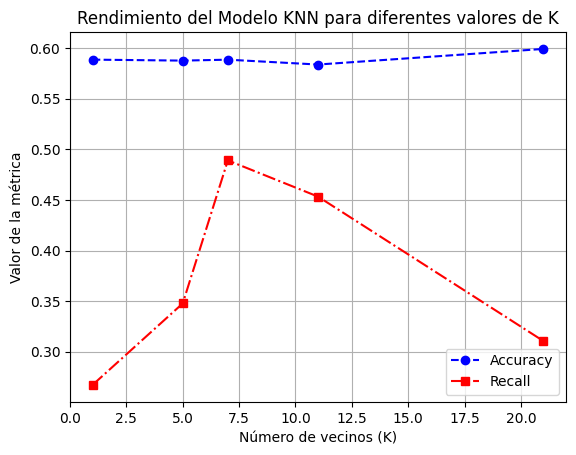


 Matriz de confusión de el resultado con mejor Recall 



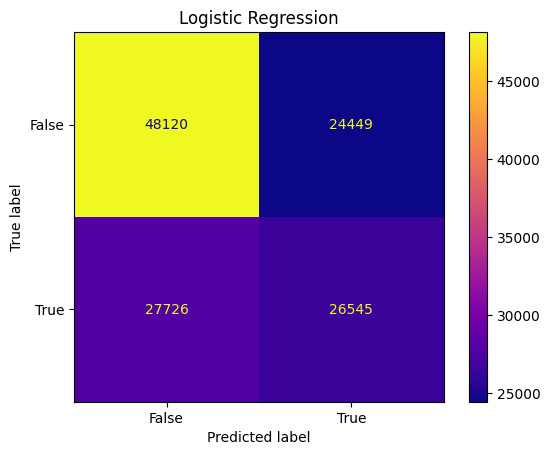


 Donde se tiene que:
TP (Verdaderos Positivos): 26545
FP (Falsos Positivos): 24449
FN (Falsos Negativos): 27726
TN (Verdaderos Negativos): 48120 



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn import metrics

# Cargar el dataset
df = pd.read_csv('dataset.csv') # https://www.kaggle.com/datasets/kandij/diabetes-dataset

# Dividir el dataset
X = df[["BMI"]]  # Solo usamos la característica BMI
y = df["HighBP"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Entrenar el modelo KNN
k_values = [1, 5, 7, 11, 21]
results = {}

accuracies = []
recalls = []
cms = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    # Se extraen TP, FP, FN y TN
    cms.append(confusion_matrix(y_test, y_pred))

    # Calcular métricas
    accuracies.append(accuracy_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

# Mostrar resultados
print("A partir de esto, se obtienen las siguiente métricas para cada k:")
print("accuracies =",accuracies)
print("recalls =",recalls)

print("\n Luego se obtiene el siguiente gráfico:\n")

# Graficar los resultados
plt.plot(k_values, accuracies, label='Accuracy', marker='o', color='b', linestyle='--')
plt.plot(k_values, recalls, label='Recall', marker='s', color='r', linestyle='-.')


plt.xlabel('Número de vecinos (K)')
plt.ylabel('Valor de la métrica')
plt.title('Rendimiento del Modelo KNN para diferentes valores de K')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print("\n Matriz de confusión de el resultado con mejor Recall \n")

# Para mostrar el gráfico de la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(cms[2], display_labels = [False, True])
cm_display.plot(cmap='plasma')
plt.title('Logistic Regression')
plt.show()

print("\n Donde se tiene que:")
# Se extraen TP, FP, FN y TN
TN, FP, FN, TP = cms[2].ravel()  # Desempaquetar los valores
print(f'TP (Verdaderos Positivos): {TP}')
print(f'FP (Falsos Positivos): {FP}')
print(f'FN (Falsos Negativos): {FN}')
print(f'TN (Verdaderos Negativos): {TN} \n')



### Analisis

### Conclusión

---

# Pregunta 3

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar tu dataset
# df = pd.read_csv('tu_dataset.csv')  # Asegúrate de cargar tu dataset correctamente

# Seleccionar características
X = df[['HighBP', 'BMI']]

# Escalar las características
X_scaled = StandardScaler().fit_transform(X)

# Configuraciones de DBSCAN
configs = [
    {'eps': 0.3, 'min_samples': 5},
    {'eps': 0.5, 'min_samples': 5},
    {'eps': 0.3, 'min_samples': 10},
    {'eps': 0.5, 'min_samples': 10}
]

# Entrenar y graficar resultados para cada configuración
for config in configs:
    dbscan = DBSCAN(eps=config['eps'], min_samples=config['min_samples'])
    clusters = dbscan.fit_predict(X_scaled)

    # Graficar resultados
    plt.figure()
    plt.title(f'DBSCAN: eps={config["eps"]}, min_samples={config["min_samples"]}')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.xlabel('HighBP')
    plt.ylabel('BMI')
    plt.colorbar(label='Cluster Label')
    plt.grid()
    plt.show()